# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the file `forestfires.csv` and `forestfires.names` are in `../data/fires/`, then you can use the code below to load them.

In [36]:
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.head()

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
fires_dt.shape

(517, 13)

In [38]:
fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [39]:
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [40]:
fires_dt.isnull().sum()

coord_x    0
coord_y    0
month      0
day        0
ffmc       0
dmc        0
dc         0
isi        0
temp       0
rh         0
wind       0
rain       0
area       0
dtype: int64

Let's display the distribution of values for the two categorical columns

In [41]:
month_distribution = fires_dt["month"].value_counts()
day_distribution = fires_dt["day"].value_counts()
print(month_distribution, end="\n\n")
print(day_distribution, end="\n\n")

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64



In [42]:
fires_dt.head()

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Get X and Y

Create the features data frame and target data.

In [43]:
# Split the data into features (X) and target (Y)
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    



## Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ ```Categorical: One-hot encoding is required by the assignment. However, I am applying a custom encoding to ensure each month and day are mapped correctly.```

Most of the forest fires occur in the month of August and September.

In the case of day, the days Friday to Monday have higher proportion of cases

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
import pandas as pd

# Mapping dictionaries for month and day Categorical Columns
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 
    'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 
    'sat': 6, 'sun': 7
}

# Custom mapping function for OneHotEncoder
def custom_OneHotEncoder(X):
    X_df = pd.DataFrame(X, columns=['month', 'day'])
    X_df['month'] = X_df['month'].map(month_mapping)
    X_df['day'] = X_df['day'].map(day_mapping)
    return pd.get_dummies(X_df).values  # Convert to one-hot encoding

# Step 1: Define Column Lists
categorical_features = fires_dt.select_dtypes('object').columns.to_list()
numerical_features = fires_dt.columns.to_list()
for col in categorical_features:
    numerical_features.remove(col)
numerical_features.remove('area')

# Step 2: Create preproc1
preproc1 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', FunctionTransformer(custom_OneHotEncoder), categorical_features)
    ]
)

preproc1


ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 FunctionTransformer(func=<function custom_OneHotEncoder at 0x16a565af0>),
                                 ['month', 'day'])])

### Preproc 2

Create preproc2 below.

````
Numeric: 
Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
The choice of scaler is up to you.
````

* A common non-linear transformation for regression problems is the [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) (which includes the Yeo-Johnson and Box-Cox transformation), as it can make data distribution more Gaussian-like and stabilize variance

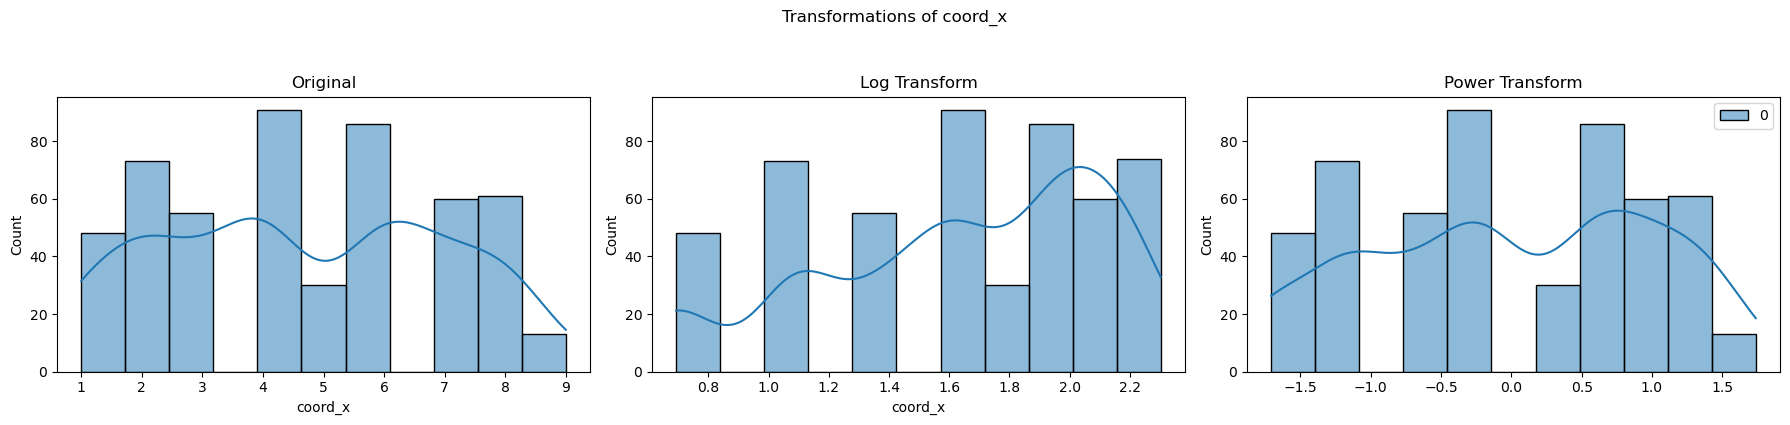

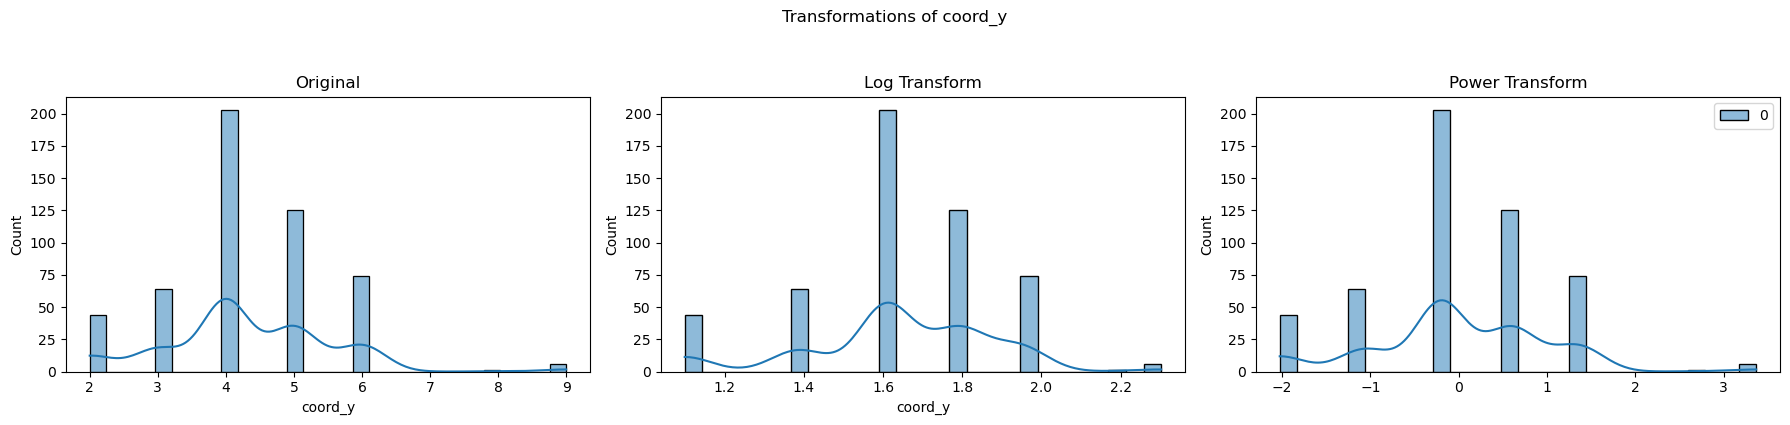

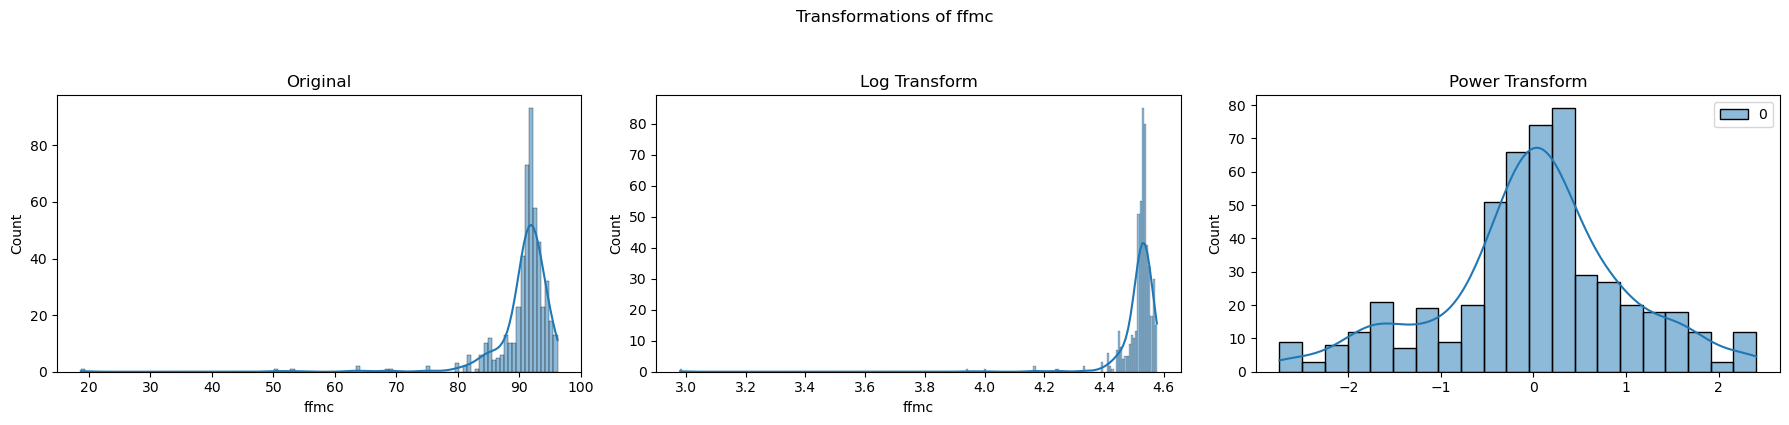

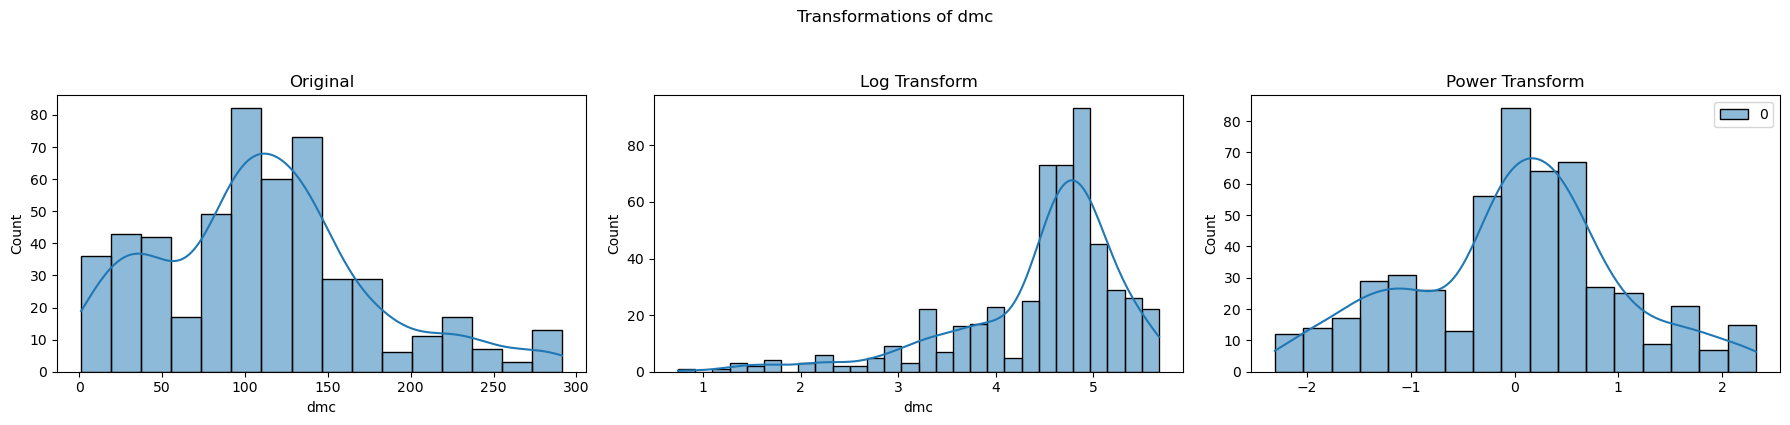

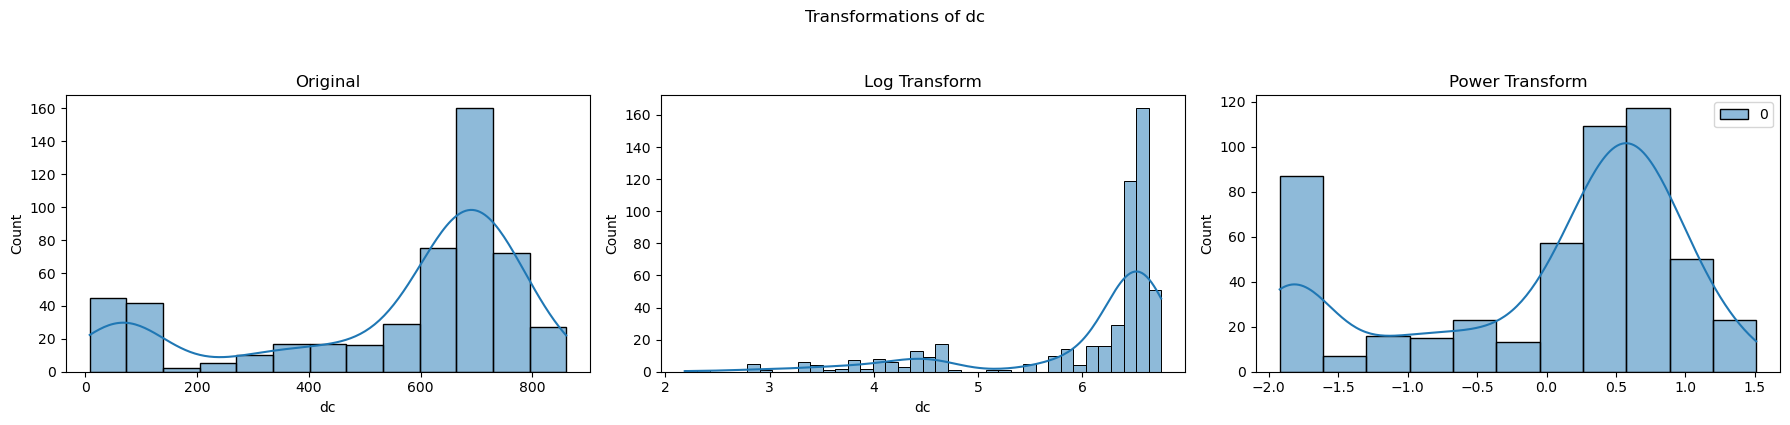

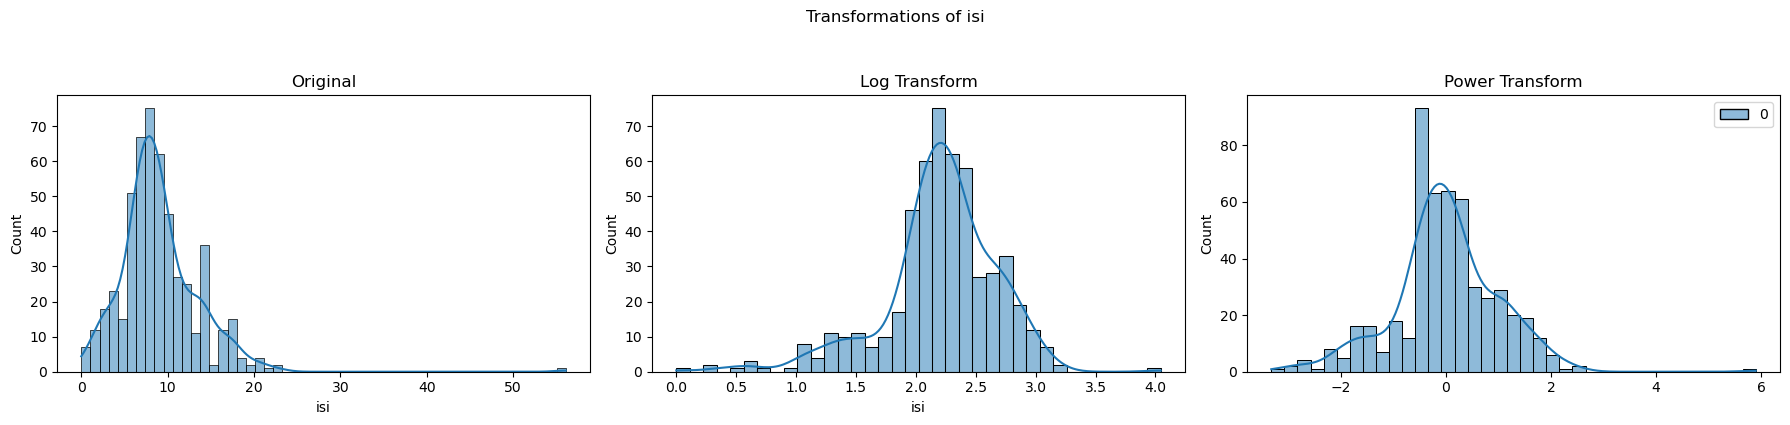

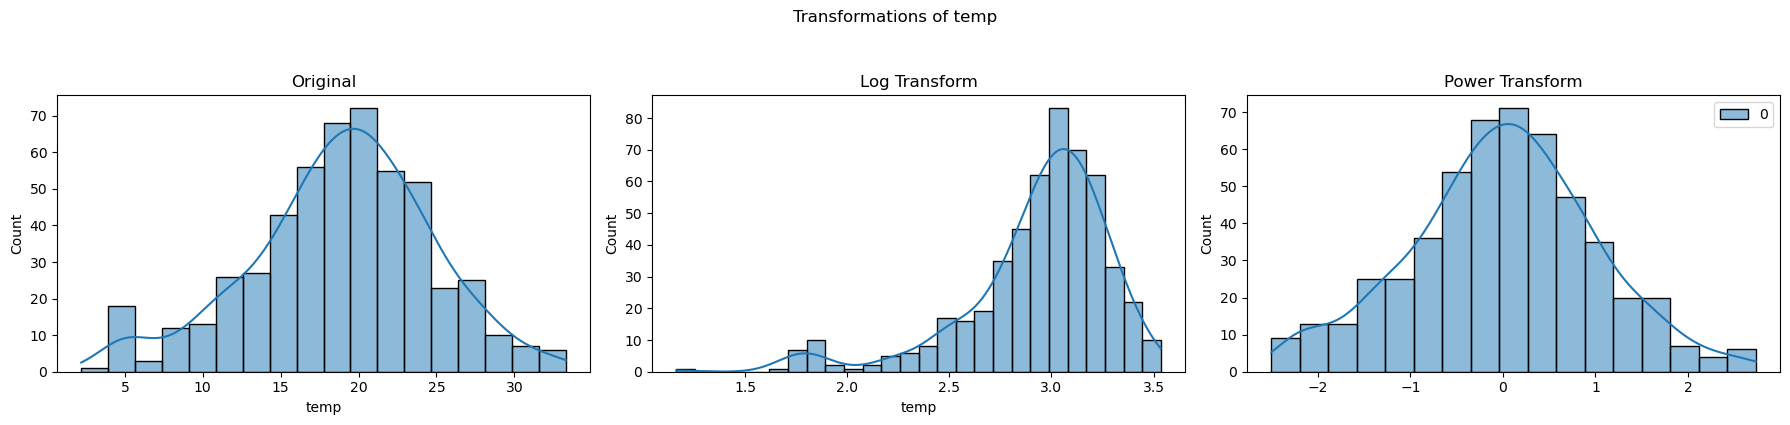

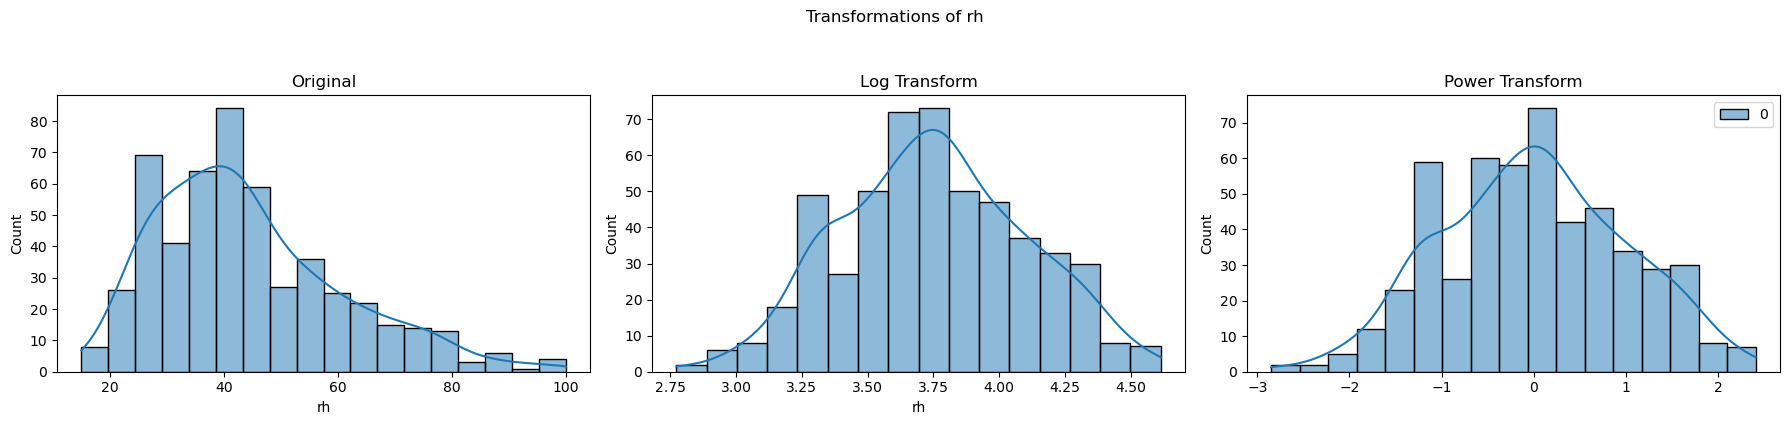

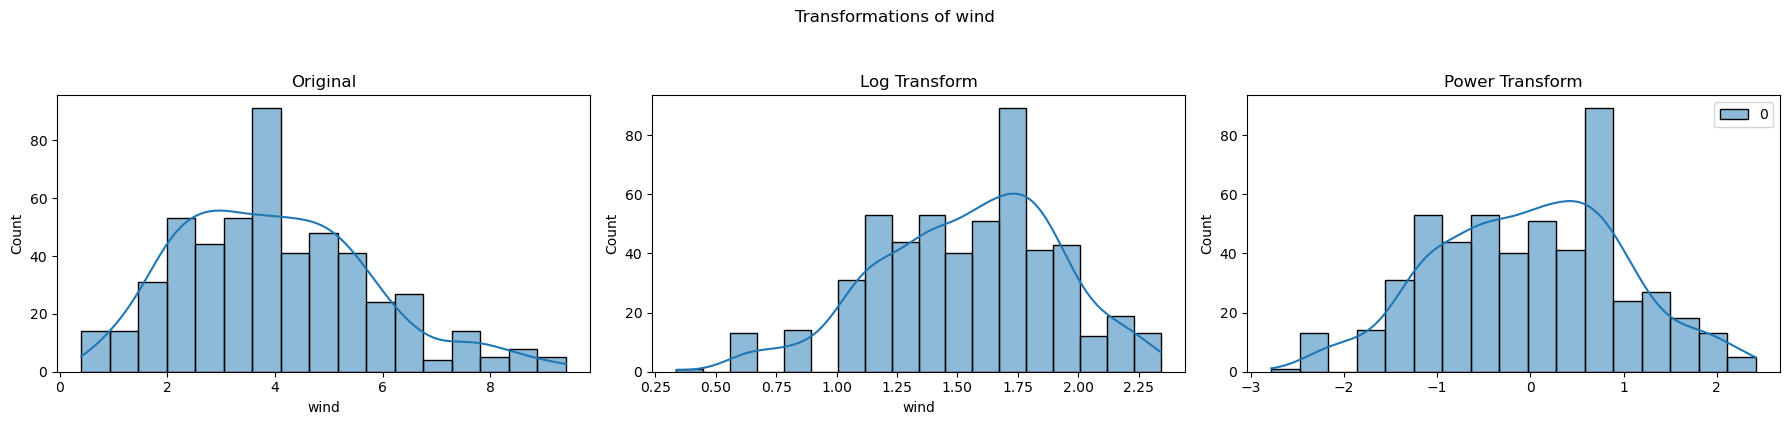

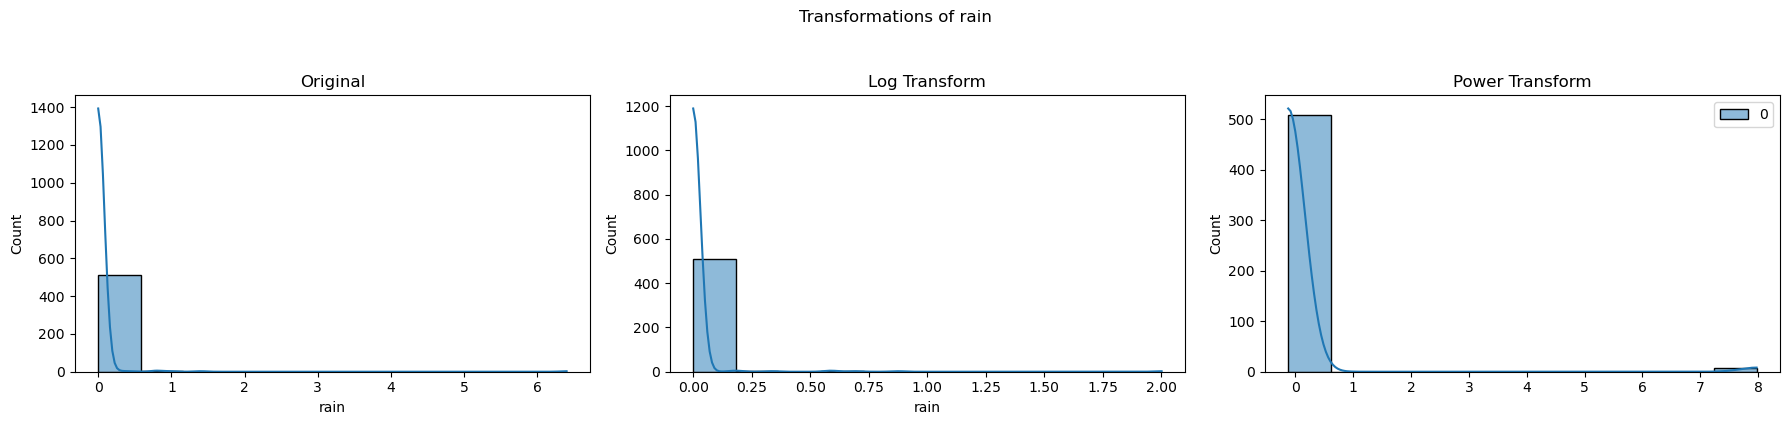

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer
power_transformer = PowerTransformer()

# Function to plot original, log-transformed, and power-transformed data
def visualize_transformations(feature):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Transformations of {feature}', y=1.05)
    
    # Original data
    sns.histplot(X[feature], kde=True, ax=axs[0])
    axs[0].set_title('Original')
    
    # Log transformation
    sns.histplot(np.log1p(X[feature]), kde=True, ax=axs[1])
    axs[1].set_title('Log Transform')
    
    # Power transformation
    transformed_data = power_transformer.fit_transform(X[[feature]].values)
    sns.histplot(transformed_data, kde=True, ax=axs[2])
    axs[2].set_title('Power Transform')
    
    plt.tight_layout()
    plt.show()

# Apply the visualization to each numerical feature
for feature in numerical_features:
    visualize_transformations(feature)


```preproc2: Adds a PowerTransformer for non-linear transformation of numerical features before scaling with MinMaxScaler. Uses the same custom one-hot encoding function for categorical features.```

In [46]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline

# Define a Power Transformation function or use the PowerTransformer directly
power_transformer = PowerTransformer()

# Step 2: Define Transformers for preproc2
# Numerical Transformer: Use PowerTransformer followed by MinMaxScaler
numeric_transformer_2 = Pipeline([
    ('power', power_transformer),
    ('scaler', MinMaxScaler())
])

# Adjust custom_OneHotEncoder function to ensure compatibility with preproc1

# Step 3: Create preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_2, numerical_features),
        ('cat', FunctionTransformer(custom_OneHotEncoder), categorical_features)
    ]
)

preproc2


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power', PowerTransformer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 FunctionTransformer(func=<function custom_OneHotEncoder at 0x16a565af0>),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

### Baseline Regressor and Advance Regressor Tuning
```
To determine if tuning is required, We need to evaluate whether tuning the hyperparameters improves the model’s performance.
```

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [48]:
# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', Ridge())
])

In [49]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', Ridge())
])


In [50]:
# Pipeline C = preproc1 + advanced model
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor())
])


In [51]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())
])


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 

### Model Evaluation
* Performace metric selected ```Root Mean Squared Error (RMSE)```

### Pipeline A: preproc1 + Ridge

In [53]:
# Parameter Grid for Ridge
param_grid_ridge = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000]
}

# GridSearchCV for Pipeline A (preproc1 + Ridge)
grid_search_A = GridSearchCV(pipeline_A, param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_search_A.fit(X_train, y_train)
best_params_A_1 = grid_search_A.best_params_
best_score_A_1 = -grid_search_A.best_score_

print(f"Pipeline A Best Params: {best_params_A_1}")
print(f"Pipeline A Best RMSE: {best_score_A_1}")


Pipeline A Best Params: {'regressor__alpha': 100}
Pipeline A Best RMSE: 38.5612006629647


### Pipeline B: preproc2 + Ridge

In [54]:
# GridSearchCV for Pipeline B (preproc2 + Ridge)
grid_search_B = GridSearchCV(pipeline_B, param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_search_B.fit(X_train, y_train)
best_params_B_1 = grid_search_B.best_params_
best_score_B_1 = -grid_search_B.best_score_

print(f"Pipeline B Best Params: {best_params_B_1}")
print(f"Pipeline B Best RMSE: {best_score_B_1}")


Pipeline B Best Params: {'regressor__alpha': 100}
Pipeline B Best RMSE: 38.5985328924605


### Pipeline C: preproc1 + RandomForest

In [55]:
# Parameter Grid for RandomForest
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Pipeline C (preproc1 + RandomForest)
grid_search_C = GridSearchCV(pipeline_C, param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_C.fit(X_train, y_train)
best_params_C_1 = grid_search_C.best_params_
best_score_C_1 = -grid_search_C.best_score_

print(f"Pipeline C Best Params: {best_params_C_1}")
print(f"Pipeline C Best RMSE: {best_score_C_1}")


Pipeline C Best Params: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}
Pipeline C Best RMSE: 41.295960514812336


### Pipeline D: preproc2 + RandomForest

In [56]:
# GridSearchCV for Pipeline D (preproc2 + RandomForest)
grid_search_D = GridSearchCV(pipeline_D, param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_D.fit(X_train, y_train)
best_params_D_1 = grid_search_D.best_params_
best_score_D_1 = -grid_search_D.best_score_

print(f"Pipeline D Best Params: {best_params_D_1}")
print(f"Pipeline D Best RMSE: {best_score_D_1}")


Pipeline D Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Pipeline D Best RMSE: 41.464801003551386


In [68]:
print("Summary of Results:")
print(f"First Run Pipeline A Best RMSE: {best_score_A_1}")
print(f"First Run Pipeline B Best RMSE: {best_score_B_1}")
print(f"First Run Pipeline C Best RMSE: {best_score_C_1}")
print(f"First Run Pipeline D Best RMSE: {best_score_D_1}")

Summary of Results:
First Run Pipeline A Best RMSE: 38.5612006629647
First Run Pipeline B Best RMSE: 38.5985328924605
First Run Pipeline C Best RMSE: 41.295960514812336
First Run Pipeline D Best RMSE: 41.464801003551386


# Tune Hyperparams
+ Tune at least one hyperparameter per pipeline.

In [58]:
# Pipeline A: preproc1 + Ridge
# Adjusted parameter grid for Ridge for tuning
param_grid_ridge_A = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'] # Adding solver as a hyperparameter
}

# GridSearchCV for Pipeline A (preproc1 + Ridge)
grid_search_A = GridSearchCV(pipeline_A, param_grid_ridge_A, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_A.fit(X_train, y_train)
best_params_A_2 = grid_search_A.best_params_
best_score_A_2 = -grid_search_A.best_score_

print(f"Pipeline A Best Params: {best_params_A_2}")
print(f"Pipeline A Best RMSE: {best_score_A_2}")


Pipeline A Best Params: {'regressor__alpha': 100, 'regressor__solver': 'svd'}
Pipeline A Best RMSE: 38.561200662964694


In [59]:
# Pipeline B: preproc2 + Ridge
# Adjusted parameter grid for Ridge for tuning
param_grid_ridge_B = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100],
    'regressor__fit_intercept': [True, False] # Adding fit_intercept as a hyperparameter
}

# GridSearchCV for Pipeline B (preproc2 + Ridge)
grid_search_B = GridSearchCV(pipeline_B, param_grid_ridge_B, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_B.fit(X_train, y_train)
best_params_B_2 = grid_search_B.best_params_
best_score_B_2 = -grid_search_B.best_score_

print(f"Pipeline B Best Params: {best_params_B_2}")
print(f"Pipeline B Best RMSE: {best_score_B_2}")


Pipeline B Best Params: {'regressor__alpha': 100, 'regressor__fit_intercept': False}
Pipeline B Best RMSE: 38.48833606240032


In [60]:
# Pipeline C: preproc1 + RandomForest 
# Adjusted parameter grid for RandomForest for tuning
param_grid_rf_C = {
    'regressor__n_estimators': [100, 150, 200], # Tuning a finer range for n_estimators
    'regressor__max_depth': [None, 10, 15],   # Reducing max depth based on previous performance
}

# GridSearchCV for Pipeline C (preproc1 + RandomForest)
grid_search_C = GridSearchCV(pipeline_C, param_grid_rf_C, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_C.fit(X_train, y_train)
best_params_C_2 = grid_search_C.best_params_
best_score_C_2 = -grid_search_C.best_score_

print(f"Pipeline C Best Params: {best_params_C_2}")
print(f"Pipeline C Best RMSE: {best_score_C_2}")


Pipeline C Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Pipeline C Best RMSE: 47.89332084946317


In [61]:
# Pipeline D: preproc2 + RandomForest
# Adjusted parameter grid for RandomForest for tuning
param_grid_rf_D = {
    'regressor__n_estimators': [100, 150, 200], # Tuning a finer range for n_estimators
    'regressor__max_features': ['auto', 'sqrt', 'log2'], # Adding max_features as a hyperparameter
}

# GridSearchCV for Pipeline D (preproc2 + RandomForest)
grid_search_D = GridSearchCV(pipeline_D, param_grid_rf_D, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_D.fit(X_train, y_train)
best_params_D_2 = grid_search_D.best_params_
best_score_D_2 = -grid_search_D.best_score_

print(f"Pipeline D Best Params: {best_params_D_2}")
print(f"Pipeline D Best RMSE: {best_score_D_2}")


Pipeline D Best Params: {'regressor__max_features': 'log2', 'regressor__n_estimators': 100}
Pipeline D Best RMSE: 44.02748574388753


In [62]:
print("New Summary of Results After Tuning:")
print(f"Second Run Pipeline A Best RMSE: {best_score_A_2}")
print(f"Second Run Pipeline B Best RMSE: {best_score_B_2}")
print(f"Second Run Pipeline C Best RMSE: {best_score_C_2}")
print(f"Second Run Pipeline D Best RMSE: {best_score_D_2}")

New Summary of Results After Tuning:
Second Run Pipeline A Best RMSE: 38.561200662964694
Second Run Pipeline B Best RMSE: 38.48833606240032
Second Run Pipeline C Best RMSE: 47.89332084946317
Second Run Pipeline D Best RMSE: 44.02748574388753


# Tune Hyperparams
+ Experiment with at least four value combinations per pipeline.

In [63]:
# Pipeline A: preproc1 + Ridge
# Different parameter grid for Ridge
param_grid_ridge_A_new = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__solver': ['lsqr', 'saga', 'svd'],
    'regressor__tol': [1e-5, 1e-4, 1e-3]
}

# GridSearchCV for Pipeline A
grid_search_A_new = GridSearchCV(pipeline_A, param_grid_ridge_A_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_A_new.fit(X_train, y_train)
best_params_A_new = grid_search_A_new.best_params_
best_score_A_new = -grid_search_A_new.best_score_

print(f"Pipeline A New Best Params: {best_params_A_new}")
print(f"Pipeline A New Best RMSE: {best_score_A_new}")



Pipeline A New Best Params: {'regressor__alpha': 1, 'regressor__solver': 'lsqr', 'regressor__tol': 0.001}
Pipeline A New Best RMSE: 39.13677472064791


In [64]:
# Pipeline B: preproc2 + Ridge
# Different parameter grid for Ridge
param_grid_ridge_B_new = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__fit_intercept': [True, False, 'deprecated'],
    'regressor__tol': [1e-5, 1e-4, 1e-3, 0]
}

# GridSearchCV for Pipeline B
grid_search_B_new = GridSearchCV(pipeline_B, param_grid_ridge_B_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_B_new.fit(X_train, y_train)
best_params_B_new = grid_search_B_new.best_params_
best_score_B_new = -grid_search_B_new.best_score_

print(f"Pipeline B New Best Params: {best_params_B_new}")
print(f"Pipeline B New Best RMSE: {best_score_B_new}")



Pipeline B New Best Params: {'regressor__alpha': 1, 'regressor__fit_intercept': False, 'regressor__tol': 1e-05}
Pipeline B New Best RMSE: 38.920762542151536


In [65]:
# Pipeline C: preproc1 + RandomForest
# Different parameter grid for RandomForest
param_grid_rf_C_new = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 5, 10, 20],
    'regressor__min_samples_split': [2, 3, 4],
    'regressor__criterion': ['mse', 'mae', 'poisson']
}

# GridSearchCV for Pipeline C
grid_search_C_new = GridSearchCV(pipeline_C, param_grid_rf_C_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_C_new.fit(X_train, y_train)
best_params_C_new = grid_search_C_new.best_params_
best_score_C_new = -grid_search_C_new.best_score_

print(f"Pipeline C New Best Params: {best_params_C_new}")
print(f"Pipeline C New Best RMSE: {best_score_C_new}")


Pipeline C New Best Params: {'regressor__criterion': 'poisson', 'regressor__max_depth': None, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 50}
Pipeline C New Best RMSE: 44.883262682234836


In [66]:
# Pipeline D: preproc2 + RandomForest
# Different parameter grid for RandomForest
param_grid_rf_D_new = {
    'regressor__n_estimators': [50, 75, 100, 125],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__bootstrap': [True, False],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Pipeline D
grid_search_D_new = GridSearchCV(pipeline_D, param_grid_rf_D_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_D_new.fit(X_train, y_train)
best_params_D_new = grid_search_D_new.best_params_
best_score_D_new = -grid_search_D_new.best_score_

print(f"Pipeline D New Best Params: {best_params_D_new}")
print(f"Pipeline D New Best RMSE: {best_score_D_new}")


Pipeline D New Best Params: {'regressor__bootstrap': True, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 4, 'regressor__n_estimators': 125}
Pipeline D New Best RMSE: 40.158559723682664


In [69]:
print("New Summary of Results After Additional Experiments:")
print(f"Experiment Pipeline A Best RMSE: {best_score_A_new}")
print(f"Experiment Pipeline B Best RMSE: {best_score_B_new}")
print(f"Experiment Pipeline C Best RMSE: {best_score_C_new}")
print(f"Experiment Pipeline D Best RMSE: {best_score_D_new}")


New Summary of Results After Additional Experiments:
Experiment Pipeline A Best RMSE: 39.13677472064791
Experiment Pipeline B Best RMSE: 38.920762542151536
Experiment Pipeline C Best RMSE: 44.883262682234836
Experiment Pipeline D Best RMSE: 40.158559723682664


# Evaluate

+ Which model has the best performance?

```
Pipeline B (preproc2 + Ridge) consistently has the best performance across all runs with the lowest RMSE of 38.488. Therefore, Pipeline B is the best-performing model in terms of RMSE in this case
```

In [72]:
print(f"Second Run Pipeline B Best RMSE: {grid_search_B.best_params_}")
print(f"Second Run Pipeline B Best RMSE: {grid_search_B.best_score_}")

Second Run Pipeline B Best RMSE: {'regressor__alpha': 100, 'regressor__fit_intercept': False}
Second Run Pipeline B Best RMSE: -38.48833606240032


# Export

+ Save the best performing model to a pickle file.

In [92]:
import pickle

best_params_B = grid_search_B.best_params_
best_score_B = grid_search_B.best_score_

pipeline_B.set_params(**best_params_B)

# Train the best-performing model (Pipeline B) on the entire dataset
pipeline_B.fit(X, y)

# Save the trained model to a pickle file
best_model_filename = 'best_pipeline_model.pkl'
with open(best_model_filename, 'wb') as file:
    pickle.dump(pipeline_B, file)

print(f'The best model (Pipeline B) has been saved to {best_model_filename}')


The best model (Pipeline B) has been saved to best_pipeline_model.pkl


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

In [78]:
import shap

# Load the trained model from the pickle file if necessary
best_model_filename = 'best_pipeline_model.pkl'
with open(best_model_filename, 'rb') as file:
    pipeline_B = pickle.load(file)


pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function custom_OneHotEncoder at 0x16a565af0>),
                                                  ['month', 'day'])])),
                ('regressor', Ridge(alpha=100, fit_intercept=False))])

  0%|          | 0/1 [00:00<?, ?it/s]

SHAP values for the observation at index 0:
coord_x: 0.6815165289097054
coord_y: 0.19559412913924515
month: -2.3568634569506592
day: 0.8586575443761937
ffmc: -0.26742668626029553
dmc: -0.6965274553571891
dc: -0.005992709977232084
isi: 0.09065837870820373
temp: -0.8719083467499281
rh: -1.9500795330856662
wind: 0.086073057707685
rain: 0.016815672641691926


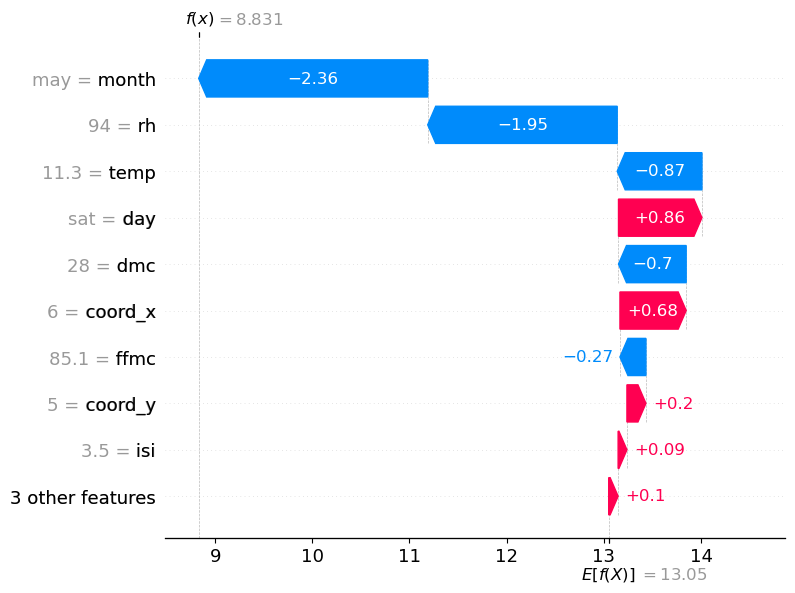

In [83]:
# Define a prediction function from the pipeline
def model_predict(data):
    # Ensure 'data' is converted back to DataFrame if necessary
    if isinstance(data, pd.DataFrame):
        return pipeline_B.predict(data)
    else:
        return pipeline_B.predict(pd.DataFrame(data, columns=X_test.columns))

# Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Use a small sample from X_test to initialize the KernelExplainer
background_sample = X_test.sample(100, random_state=42)  # Adjust the sample size if needed

# Create the SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(model_predict, background_sample)

# Select the specific observation to explain from X_test
observation_index = 0
observation = X_test.iloc[[observation_index]]  # Ensure observation is a DataFrame

# Calculate SHAP values for the single observation
shap_values = explainer.shap_values(observation, nsamples=100)

# Print out the features and their respective SHAP values
print(f"SHAP values for the observation at index {observation_index}:")
for feature_name, shap_value in zip(X_test.columns, shap_values[0]):
    print(f"{feature_name}: {shap_value}")

# Plot the SHAP values for the specific observation
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=observation.values[0],
                                      feature_names=observation.columns))

# Force plot for a more interactive visualization
shap.initjs()
shap.plots.force(shap.Explanation(values=shap_values[0],
                                  base_values=explainer.expected_value,
                                  data=observation.values[0],
                                  feature_names=observation.columns))


1. coord_x: 0.6815: This feature contributes positively to the prediction by 0.6815 units.
2. coord_y: 0.1956: This feature contributes positively to the prediction by 0.1956 units.
3. month: -2.3569: This feature contributes negatively to the prediction by -2.3569 units.
4. day: 0.8587:This feature contributes positively to the prediction by 0.8587 units.
5. ffmc: -0.2674:This feature contributes negatively to the prediction by -0.2674 units.
6. dmc: -0.6965:This feature contributes negatively to the prediction by -0.6965 units.
7. dc: -0.0060:This feature contributes negatively to the prediction by -0.0060 units.
8. isi: 0.0907:This feature contributes positively to the prediction by 0.0907 units.
9. temp: -0.8719:This feature contributes negatively to the prediction by -0.8719 units.
10. rh: -1.9501:This feature contributes negatively to the prediction by -1.9501 units.
11. wind: 0.0861:This feature contributes positively to the prediction by 0.0861 units.
12. rain: 0.0168:This feature contributes positively to the prediction by 0.0168 units.

```
For the given observation, "month" and "rh" are the most important features that explain the lowering of the prediction, while "day" and "coord_x" are the most influential in increasing the prediction.
```


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - In general, across the complete training set, which features are the most and least important.

In [85]:
def model_predict(data):
    # Ensure 'data' is converted back to DataFrame if necessary
    if isinstance(data, pd.DataFrame):
        return pipeline_B.predict(data)
    else:
        return pipeline_B.predict(pd.DataFrame(data, columns=X_train.columns))

# Ensure X_train is a DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# Use a small sample from X_train to initialize the KernelExplainer
background_sample = X_train.sample(100, random_state=42)  # Adjust the sample size if needed

# Create the SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(model_predict, background_sample)

# Calculate SHAP values for the entire training set
shap_values = explainer.shap_values(X_train)


  0%|          | 0/413 [00:00<?, ?it/s]

In [91]:

# Print out the features and their respective SHAP values
print(f"SHAP values for the In General:")
for feature_name, shap_value in zip(X_test.columns, shap_values[0]):
    print(f"{feature_name}: {shap_value}")

SHAP values for the In General:
coord_x: -0.28210723153428446
coord_y: -0.31975357981469416
month: 1.251778101616955
day: 1.025185068134005
ffmc: 0.029350378023663474
dmc: -0.03529579214913017
dc: 0.0029229485990351863
isi: 0.002256932844645884
temp: 0.4562791743635271
rh: 0.9624606707558605
wind: 0.03170700725608433
rain: 0.025223508962547214


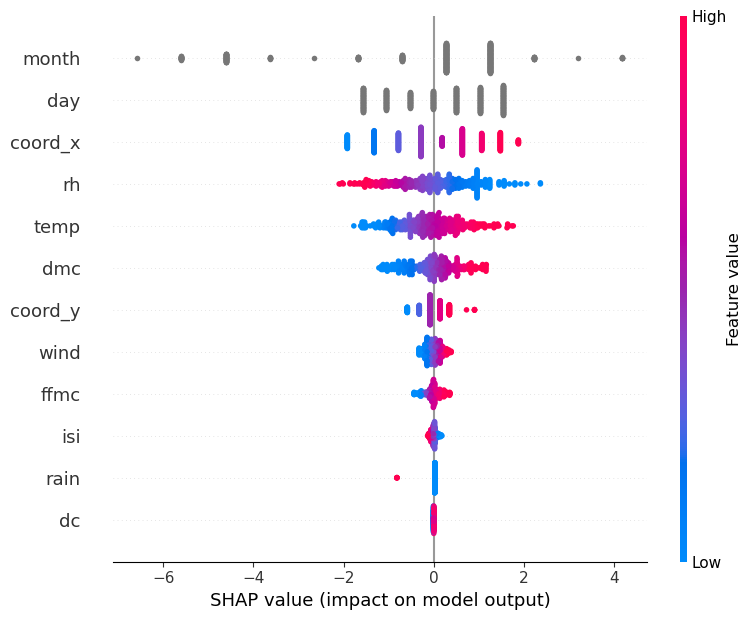

In [86]:
shap.summary_plot(shap_values, X_train)

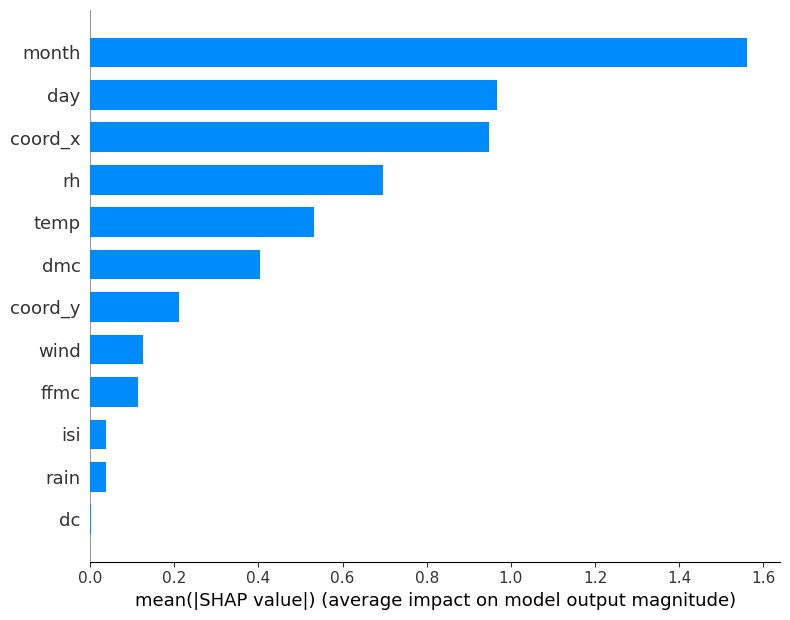

In [87]:
# Plot bar chart of SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")


```
In general, across the complete training set, the most important features are month, day, rh, and temp. These features have the highest average contributions (positive or negative) to the model's predictions. Conversely, the least important features are dc, isi, rain, and wind, which have the lowest average contributions.
```

# Explain

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

```
Using SHAP values. The features with the least impact on the model's predictions, as indicated by low SHAP values, are good candidates for removal
```

1. Based on the SHAP analysis, identify the features with the lowest mean absolute SHAP values. These are likely contributing the least to the model’s predictions.
Least Important Features (based on SHAP):
* **dc** (Drought Code): 0.005
* **isi** (Initial Spread Index): 0.006
* **rain**: 0.02
* **wind**: 0.03

2. Create a new dataset excluding the least important features. 
* features_to_remove = ['dc', 'isi', 'rain', 'wind']

3. Retrain the Model with the Reduced Feature Set

4. Compare Model Performance: Use same metrics Mean Squared Error (MSE)

5. Final Decision
* If performance is maintained or improved: Confirm that the removed features
* If performance degrades noticeably: Reevaluate the importance of the removed features

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.